## ✅부스팅 (Boosting)
- 여러 개의 약한 Decision Tree를 조합해서 사용하는 Ensemble 기법 중 하나
    - 약한 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측 모형을 만드는 것
- 여러 개의 분류기를 만들어 투표를 통해 예측값을 결정한다는 측면에서 배깅과 동일
- 배깅은 서로 다른 알고리즘에 기반한 여러 분류기를 병렬적으로 학습하는 반면, 부스팅은 **동일한 알고리즘의 분류기를 순차적으로 학습** 해서 여러 개의 분류기를 만든 후, 테스트할 때 가중 투표를 통해 예측값을 결정
- **순차적 학습** 과 **가중 투표** 가 부스팅의 가장 큰 특징

<br>

#### 순차적 학습
- 인물 사진 안에 있는 인물을 보고, 남자 또는 여자로 분류하는 의사결정 트리를 부스팅할 경우, 먼저 첫 번째 의사결정 트리를 학습
- 테스트 결과, 남자 분류가 미흡할 경우, 남자 학습 데이터를 보강한 후 두 번째 의사결정 트리를 학습
- 두 번째 의사결정 트리의 테스트 결과에 따라 학습 데이터를 보강해서 세 번째 의사결정 트리를 학습
- 이처럼 부스팅은 **순차적으로 학습 데이터를 보강하며 동일한 알고리즘의 분류기를 여러 개 만드는 과정** 을 가짐

<br>

#### 가중 투표
- 배깅은 선거처럼, 동일한 한 표씩 부여되는 반면 부스팅은 **가중 투표** 가 진행됨
- 가중 투표는 투표자의 능력치에 따라 한 표의 가치가 다른 투표

<br><hr>

# 08-03. XGBoost
### (eXtreme Gradient Boosting)
- (내부 알고리즘으로) **과적합 방지**가 가능한 규제가 포함되어 있음
- CART(Classification And Regression Tree)를 기반으로 하므로 **분류와 회귀** 둘 다 가능
- **조기 종료(early stopping)** 기능 제공
  - 계속 업데이트되어서 버전마다 동작이 잘 안 되는 경우가 있음
- 앙상블 부스팅의 특징인 가중치 부여를 **경사하강법(Gradient descent)** 으로 함

<br>

1. AdaBoost (Adaptive Boost)
  - 약한 모형으로 설정한 초기 모형을 매 단계마다 가중치를 이용(*오분류된 데이터의 가중치를 높이는 방식*)하여 이전 모형의 약점을 보완하는 새로운 모형을 순차적으로 적합한 뒤 최종적으로 각각의 모형을 선형결합
  
2. Gradient Boosting
  - 잔차를 이용하여 이전 모형의 약점을 보완하는 (생략)

3. XGBoost
  - Gradient Boosting + 과적합 방지 기법 추가

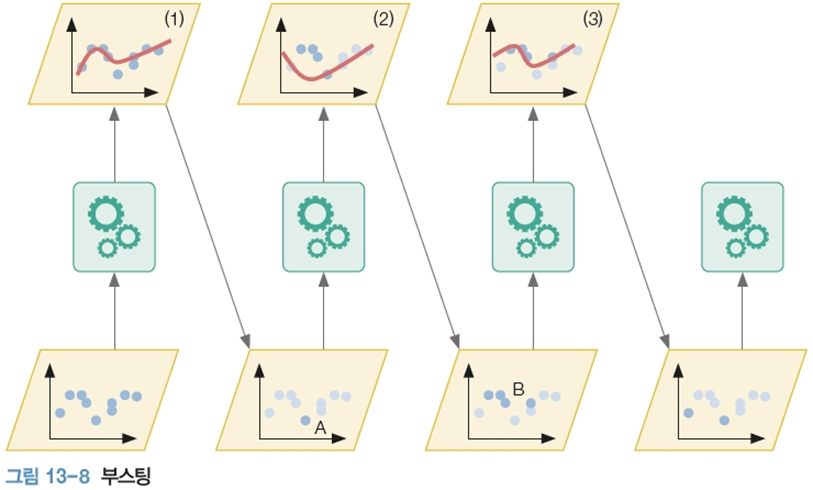

In [2]:
# sklearn 패키지에 아직 없으므로 직접 설치해야 함
# conda install -c anaconda py-xgboost

# XGBoost 버전 확인
import xgboost as xgb

print(xgb.__version__)  # 2.1.1

2.1.1


## 위스콘신 대학 병원 유방암 예측 데이터 

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 데이터 불러오기
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target    # 0과 1

col_names = dataset.feature_names

In [5]:
cancer_df = pd.DataFrame(data=X_features, columns=col_names)
# 데이터프레임에 종속변수 추가
cancer_df['target'] = y_label

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
print(dataset.target_names)  # ['malignant' 'benign']
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
# train data
X_features = cancer_df.iloc[:, :-1]
# target data
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2,
                                                    random_state=156)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (455, 30)
y_train: (455,)
X_test: (114, 30)
y_test: (114,)


In [8]:
# train 데이터를 다시 쪼개서 90%는 학습용으로, 10%는 검증용으로 분리 >> k-fold 교차검증으로도 가능
X_TRAIN, X_val, y_TRAIN, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.1,
                                                    random_state=156)
print("X_TRAIN:", X_TRAIN.shape)
print("y_TRAIN:", y_TRAIN.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_TRAIN: (409, 30)
y_TRAIN: (409,)
X_val: (46, 30)
y_val: (46,)


<hr>

### 파이썬 래퍼 XGBoost 적용

In [9]:
from xgboost import plot_importance 
import numpy as np

In [10]:
# xgboost에서 데이터를 전달받아 처리하고자 할 때 xgboost 전용 자료형으로 데이터를 변경해야 함
# `xgb.DMatrix()` 함수로 데이터 자료구조 변경하여 dtr 변수에 저장

dtrain = xgb.DMatrix(data=X_TRAIN, label=y_TRAIN)   # 훈련용 데이터
dval = xgb.DMatrix(data=X_val, label=y_val)            # 검증용 데이터
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [11]:
# 하이퍼 파라미터 세팅
params = {'max_depth':3,
          'eta':0.05,      # 기울기를 찾을 때 조정하는 간격 (크게 잡을 경우 최솟값을 지나치고 발산됨)
          'objective':'binary:logistic',
          'eval_metric':'logloss'}

# 경사하강법에서 얼만큼 반복하면서 최솟값(기울기=0)을 찾을 것인지
num_rounds = 400

In [12]:
# 학습 데이터 'train' 또는 평가 데이터 'eval'로 명기
eval_list = [(dtrain, 'train'), (dval, 'eval')]

In [13]:
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터 전달
xgb_model = xgb.train(params=params, dtrain = dtrain,
                      num_boost_round=num_rounds,
                      early_stopping_rounds=50,      # 최소로 50번 학습시키고 이후에 큰 변화가 없으면 학습 중지 가능
                      evals=eval_list
                      )

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

[170]	train-logloss:0.01317	eval-logloss:0.24117
[171]	train-logloss:0.01308	eval-logloss:0.24126
[172]	train-logloss:0.01299	eval-logloss:0.24046
[173]	train-logloss:0.01292	eval-logloss:0.23993
[174]	train-logloss:0.01284	eval-logloss:0.23985
[175]	train-logloss:0.01275	eval-logloss:0.23994
[176]	train-logloss:0.01268	eval-logloss:0.23986
[177]	train-logloss:0.01260	eval-logloss:0.23996
[178]	train-logloss:0.01253	eval-logloss:0.23943
[179]	train-logloss:0.01243	eval-logloss:0.23847
[180]	train-logloss:0.01236	eval-logloss:0.23842
[181]	train-logloss:0.01226	eval-logloss:0.23885
[182]	train-logloss:0.01220	eval-logloss:0.23828
[183]	train-logloss:0.01214	eval-logloss:0.23892
[184]	train-logloss:0.01205	eval-logloss:0.23804
[185]	train-logloss:0.01198	eval-logloss:0.23799
[186]	train-logloss:0.01191	eval-logloss:0.23809
[187]	train-logloss:0.01185	eval-logloss:0.23752
[188]	train-logloss:0.01176	eval-logloss:0.23662
[189]	train-logloss:0.01170	eval-logloss:0.23659
[190]	train-logloss:

In [14]:
# 학습된 모델로 예측값 구하기 (확률값 반환)
# sklearn 패키지를 사용하는 것이 아니므로 확률값을 0/1로 변환해주지 않음
pred_probs = xgb_model.predict(dtest)

# 10개만 확인 (소수점 셋째자리까지)
np.round(pred_probs[:10], 3)

array([0.938, 0.004, 0.75 , 0.049, 0.98 , 1.   , 0.999, 0.999, 0.998,
       0.001], dtype=float32)

In [15]:
# 예측 확률이 0.5보다 크면 1(악성), 그렇지 않으면 0(양성)으로 예측
predicted = [1 if x > 0.5 else 0 for x in pred_probs]
print(predicted[:10])

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


<hr>

## 성능평가

In [16]:
# 분류 모델의 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [17]:
# 성능평가를 위한 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):    # 데이터가 전달되지 않았을 때는 None값으로 대체
  confusion = confusion_matrix(y_test, pred)
  acc = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  # ROC_AUC 추가
  roc_auc = roc_auc_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('\n정확도:{0:.4f}, \n정밀도: {1:.4f}, \n재현율: {2:.4f}, \nf1-score: {3:.4f}, \nAUC:{4:.4f}'.format(acc, precision, recall, f1, roc_auc))

In [18]:
get_clf_eval(y_test, predicted, pred_probs)

오차행렬
[[35  2]
 [ 2 75]]

정확도:0.9649, 
정밀도: 0.9740, 
재현율: 0.9740, 
f1-score: 0.9740, 
AUC:0.9600


In [19]:
# 시각화
import matplotlib.pyplot as plt

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

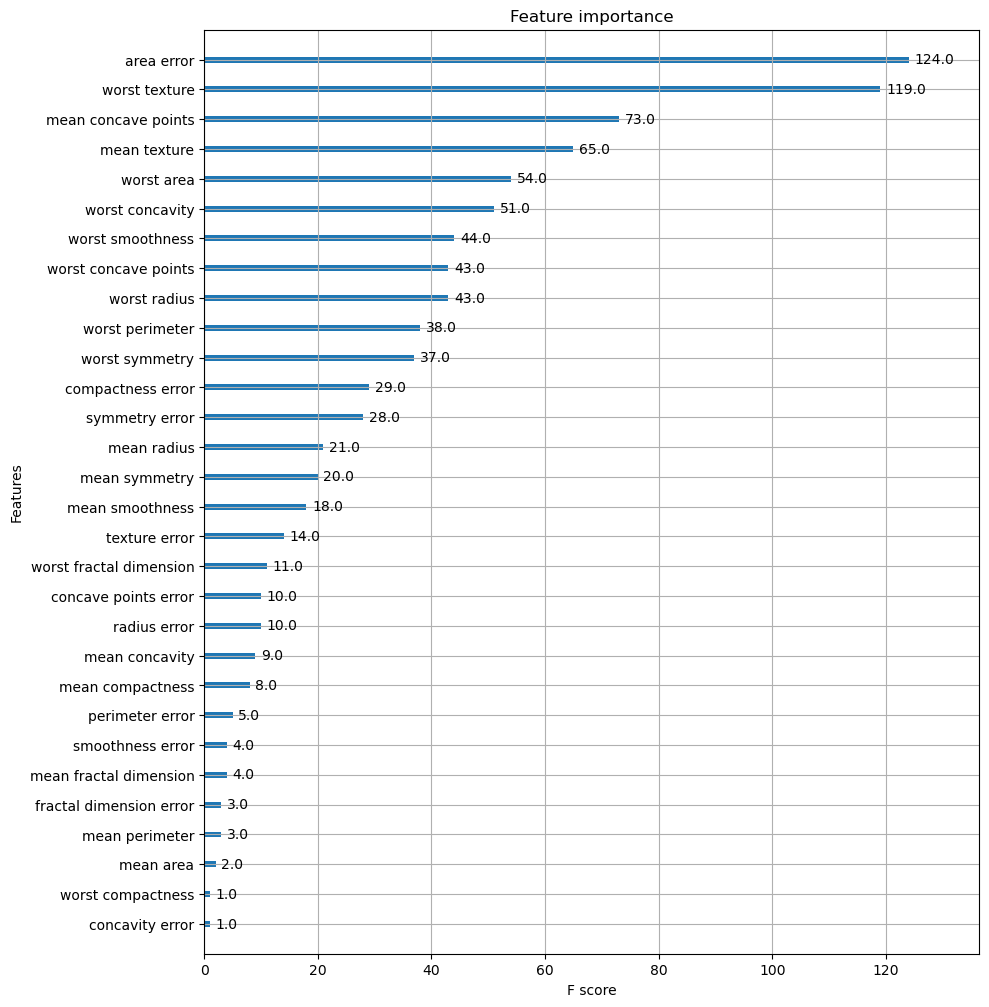

In [20]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
# plt.savefig('xgb_feature_importance.tif', format='tif', dpi=300)           # 이미지 파일로 저장

## sklearn 래퍼 XGBoost의 적용

In [21]:
from xgboost import XGBClassifier

In [22]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=0.1,
                            max_depth=3,

                            # 조기 종료를 위한 매개변수 (eval_metric, early_stopping_rounds)
                            eval_metric='logloss',    # 로그 손실 함수
                            early_stopping_rounds=50)

evals=[(X_test, y_test)]

# verbose: 출력의 결과를 보여주는 속성(default-True)
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=True)

# 예측값 저장 (정수값, 확률값)
w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

# 오차가 점점 커지거나 오차에 변화가 없다면 자동으로 조기 종료

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

In [23]:
get_clf_eval(y_test, w_preds, w_preds_proba)

오차행렬
[[34  3]
 [ 1 76]]

정확도:0.9649, 
정밀도: 0.9620, 
재현율: 0.9870, 
f1-score: 0.9744, 
AUC:0.9530
